<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/HW22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.2 Probability Distributions**
*   2.2.1: Probability Axioms
*   2.2.2: Conditional Probability
*   2.2.3: Discrete Random Variables
*   2.2.4: Continuous Random Variables   

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# **2.2.1 Probability Axioms**

The sample space of an experiment, *S*, is the set of all possible outcomes of the experiement. An event is any subset of outcomes in *S*. A simple event consists of exactly one outcome. A compound event consists of more than one outcome.

The probability distribution is a function that assigns, to each event *A* in *S*, *P(A)*, which represents the probability, or chance, of *A* occuring.

In some cases, for an experiment with *N* possible outcomes, the probability of each event occuring could be equal. Thus, for *N* equally likely outcomes, the probability of each occuring is $\frac{1}{N}$.


In [17]:
def equally_likely(num_outcomes):
  return 1/num_outcomes
num_outcomes = np.random.randint(1,10)
print("Number of possible outcomes: ", num_outcomes)
print("Probability of each outcome: ", equally_likely(num_outcomes))

Number of possible outcomes:  7
Probability of each outcome:  0.14285714285714285


# **2.2.2 Conditional Probability**

Conditional probability is the likelihood of an event *A* occuring given that another event *B* already occured. This is denoted by $P(A|B)$. The formula for conditional probability is:

$P(A|B)$ = $\frac{P(A⋂B)}{P(B)}$

where $P(A⋂B)$ is the joint probability of events *A* and *B* occuring.

Events *A* and *B* are considered to be independent events if the occurance or nonoccurance of one event has no effect on the probability of the other event occuring. That is,

$P(A|B) = P(A)$ or $P(A⋂B) = P(A) \times P(B)$

This property can be applied to multiple events. Consider the set of events $A_1,A_2,...A_n$. These events are mutually independent if:

$P(A_1⋃A_2⋃...⋃A_n) = P(A_1) \times P(A_2) \times ... \times P(A_n)$

In [18]:
A = np.random.randint(0,100)/100
B = np.random.randint(0,100)/100
print("P(A): ", A)
print("P(B): ", B)
def conditional_prob(A,B):
  return (A*B)/B
def is_independent(A,B):
  return conditional_prob(A,B) == A
print("P(A|B): ", conditional_prob(A,B))
print("Independence of A and B:", is_independent(A,B))

P(A):  0.26
P(B):  0.45
P(A|B):  0.26
Independence of A and B: True


# **2.2.3 Discrete Random Variables**

A random variable is a variable whose values depend on outcomes of a random phenomenon. It can be defined as a function whose domain is the sample space *S* of an experiment and whose range is in $\Re$.

A discrete random variable is one whose possible values are either a finite set or can be listed in an infinite sequence.

A probability mass function (PMF) is a function that returns the probability that a discrete random variable is exactly equal to some value.

$p(x) = p(X = x) = P($all s $∈ S: X(s) = x)$

The cumulative distribution function (CDF) of a discrete random variable with PMF p(x) is defined as:

$F(x) = P(X ≤ x) = \Sigma_{y: y≤x} p(y)$

The expected value (E(X)) of a random variable X is essentially the mean of numerous trials of an experiment involving X.

$E(X) = \Sigma_{x∈D} x⋅p(x)$

where D is the set of all possible values of X.

The variance (Var(X)) of a random variable X measures how spread out X is from its expected value.

$Var(X) = E[(x-E[X])^2] = \Sigma_{x∈D} (x-E[X])^2 \cdot p(x)$

In [19]:
x = [1, 2, 3, 4, 5]
p = [0.1, 0.2, 0.3, 0.2, 0.2]
print("Adds to 1: ", sum(p) == 1) #probabilities should sum up to 1
def pmf(x,p):
  return p[x]
def cdf(x,p):
  sum = 0
  for i in range(x+1):
    sum += p[i]
  return sum
def expected_value(x,p):
  sum = 0
  for i in range(len(x)):
    sum += x[i]*p[i]
  return sum
def var(x,p):
  sum = 0
  for i in range(len(x)):
    sum += (x[i]-expected_value(x,p))**2*p[i]
  return sum
print("P(X = 3): ", pmf(3,p))
print("P(X ≤ 3): ", cdf(3,p))
print("E(X): ", expected_value(x,p))
print("Var(X): ", var(x,p))
print("Standard deviation of X:", var(x,p)**0.5) #standard deviation is square root of variance

Adds to 1:  True
P(X = 3):  0.2
P(X ≤ 3):  0.8
E(X):  3.2
Var(X):  1.56
Standard deviation of X: 1.2489995996796797


# **2.2.4 Continuous Random Variables**

A random variable X is continuous if possible values comprise either a single interval on the number line or a union of disjoint intervals.

The probability density function (PDF) of a continuous random variable is a function f(x) such that, for any two numbers *a* and *b*, *a* ≤ *b*:

$P(a \le X \le b) = ∫_{a}^{b}f(x)dx$

In other words, the above equation gives the probability that X takes on a value in the interval [*a*,*b*].

E(X) and Var(X) are defined as:

$E(X) = ∫_{-∞}^{∞}x \cdot f(x)dx$

$Var(X) = ∫_{-∞}^{∞}(x-E(X))^2 \cdot f(x)dx$

In [20]:
def pdf(x):
  return norm.pdf(x, loc=0, scale=1)
def cdf(x):
  return norm.cdf(x, loc=0, scale=1)
def expected_value(x):
  return norm.expect(lambda x: x, loc=0, scale=1)
def var(x):
  return norm.expect(lambda x: (x-expected_value(x))**2, loc=0, scale=1)
x = np.linspace(-3, 3, 100)
y = pdf(x)
EV = expected_value(x)
var = var(x)
print("P(-1 ≤ X ≤ 1): ", cdf(1)-cdf(-1))
print("E(X): ", EV)
print("Var(X): ", var)
print("Standard deviation of X:", var**0.5)

P(-1 ≤ X ≤ 1):  0.6826894921370859
E(X):  -1.3877787807814457e-17
Var(X):  1.0
Standard deviation of X: 1.0


Mathematically, a continuous random variable X has a normal distribution if, for f(x), the probability density function of X:

$f(x) = \frac{1}{\sqrt{2\pi}σ}e^{-(x-\mu)^2/(2σ^2)}$

In [21]:
def isNormalDistribution(mu, sigma):
  return all(np.isclose(pdf(x),1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)), atol=1e-3))
print("Is X a normal distribution?", isNormalDistribution(EV,var**0.5))

Is X a normal distribution? True


We can examine the normal distribution by graphing X, which will take on a "bell curve" shape, as all such distributions do:

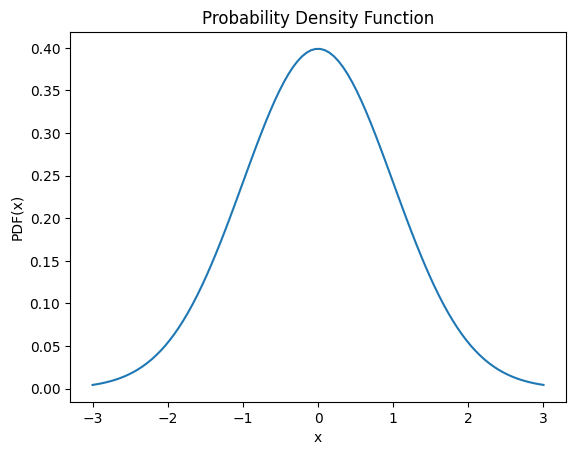

In [22]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.title('Probability Density Function')
plt.show()